<h1 align = 'center'> Comparisons of the applications of a proceduraly generated lightcruve model in finding transiting exoplanets traditionally and using a convolution neural network </h1>

<div class="alert alert-block alert-danger">
<b>Candidate number: Your candidate number here (this is a five digit number). </b>

- This Coursework contributes <b>80%</b> to your overall unit mark.

- Will be marked anonymously.

- Keep to word limits (+- a few words).

- You can use the WordCounter notebook to check your word count.

- Code & figure captions do not count towards word limits.
</div>

### Abstract: 

Here, give an overview of your work, make sure to describe the science background, methods, results as well as comparisons to literature data. Keep this short.
<div class="alert alert-block alert-danger">

Planets found for the Unkown system with the following periods. A convolution neural network developed to demonstrate the uses of Machine Learning in Exoplanet detection train on sythentic data demonstrates the difficulty with the applications of such a method. It will be presented that while there is difficulties in using a neural network for exoplanet detection, it deserves further exploring and a combination of a trained model with manual detection could prove fruitful in finding more planets. A current issue with transit detection is the selection bias towards big planets with low periods[], Classificalion using a Convolution neural netwrok will assist in finding planets with a larger period as a train model does not have the overhead of (FIND OVERHEAD) scaling as period increases.

<b>word limit 250 words.</b>

#### Imports: give all your imports in a box here. Any custom code you have stored in a .py file needs to be submitted with your coursework. You can freely use all code provided to you as part of this course. If you use code not encountered in the course, give a link to the online repo.

In [2]:
import transitFinderFunctions as tff
import importlib
import scipy.optimize as opt
import PlanetGenerationExtreme as pg
import matplotlib.pyplot as plt
import numpy as np 
import analyseLightCurvesExtreme as ml_prediction
from IPython.display import Image
# Reload the courseworkb module to ensure the latest version is used
importlib.reload(tff)
importlib.reload(pg)

<module 'PlanetGenerationExtreme' from '/home/omcevoy/AstroCourseworkB/PlanetGenerationExtreme.py'>

<div class="alert alert-block alert-danger">
<b>Make sure to include the relevant python files in your upload</b>

<h2 align="center">  1. Introduction: </h2>

</br>
<h3 align="center">  1.1 Finding Transits in an Unkown system </h3>


There are currently (X) Exoplanets discovered (X%) are Large with a small period,  The average size of these planets discovered is (X)[]. One particlar method of finding exoplanets is the transit method, this will be a periodic dip in a lightcurve corrosponding to whenever a planet passes infront of its hosts star. A Fourier Transform in the form of a lomb_scargle [] is applied to find the periodic nature of a given light curve, a second lomb_scargle is then performed on the produced output providing peaks where a periodic dip in the lightcurve is present.

</br>
<h3 align="center">  1.2. The current context of machine learning in astrophysics  </h3>

The advent of machine learning for exoplanet detection is still in its infatncy. In 2017 a convolutional neural network discovered a new planet in Kepler 80, and a new planet in Kepler 90[], other attempts have been made but with a succesrate less than deseriable [].

A major issue with current applications of machine learning in the realm of Astrophysics is the lack of training data. A general rule of thumb is a dataset should be X times the amount of potential inputs, a light curve of 1600 days with a cadence of 30 minutes results in approximately 76,800 data points when ignoring gaps in data. To plug this gap in training data it is hypothesised synthetic data can be used to increase the accuracy, percision and reliability of these models. 

This report will also compare a convolutional neural network and a recursive neural network, and contrast how well each of them work to the dataset provided.

</br>
<h3 align="center"> 1.3. Modelling Exoplanerty Transits </h3>

When creating synthetic transit lightcurves a balance needs to be found between percision and computational efficiency. Models such as Exoplanet [] while incredibly percise in their measurements are not computationally efficient. The Synthetic lightcurve generator provided as part of this report aims to take into account a vast variaety of physical phenomona while also remaining grounded, using computationally efficent calculations in an effort to scale for large data production. It should also be able to be varied with pertubations to allow for a variaty of datasets.

#### 1.3.X Modelling the limb darkening effect.

The brightness across the surface of a star is not constant. Due to the large distances it can be approximated as a 2d tangent plane to the suns surface, the drop in the apparent brightness can be approximated and modelled with the following parameters [],
$$
      I(\mu) = 1 − u_1 (1 − \mu^{u_2}).
$$
This is am empirical formula where, $I$ is the intensity, $u_1$ and $u_2$ are the limb darkening coefficients and $\mu$ is the normalised distance from the limb, it will be modelled as
$$
\mu = 
\begin{cases} 
(1 - s^2)^{1/2} & \text{if } s < 1 \\
0 & \text{if } s \geq 1 
\end{cases} .
$$
A final correction will also be made to normalise the brightness of the star in terms of average brightness instead of the peak brightness.
$$
I_{\text{avg}} \propto \int_{0}^{1} I(\mu) \mu \, d\mu \propto \frac{2 + \alpha (1 - u)}{2 + \alpha}
$$
This law allows the shape of normalised intensity with few parameter. The simplicity of this model lends itself to computationally efficenty, this is greatly desired as a significant amount of lightcurves will be generated an efficent model is needed.

In order for the planet generation to mimic the behavior of an exoplanetary transit system, these coefficents will be determined from the provided system and then used, with a small pertubation, in the exoplanetary lightcurve generator model. In theory this will then allow for the training of a recursive neural network on synthetic data which is in the same vain as real data.



<div class="alert alert-block alert-danger">
<b>Word limit: 600 words</b>

### 2. Results - Modelling of Kepler lightcurve

$\bullet$ describe fitting of transit depths and present results with errors

$\bullet$ describe periodogram and identification of periodic features in lightcurves

$\bullet$ describe motivation for any additional fitting you have done

$\bullet$ include code for all modelling in attached code or inline, describe limitations and assumptions made

<div class="alert alert-block alert-danger">
    
<b>Keep this concise: word limit 500 words</b>

In [2]:
# Load the data into a dataframe.
# Medfilt found to be best 
file_path = 'CourseworkData/Objectlc'
kepler_dataframe = tff.loadDataFromFitsFiles(file_path,'medfilt')

The intial peaks are found using a Lomb-Scargle Periodogram due to its computational efficiency compared to the box of least squares fit. These are found to be 10.3, 13.03,26.13,31.99,39,82 and 46.67.

The box of least squares is then used to find the percise period and corrosponding uncertainities 

In [3]:
peaks = [10.3,13.03,31.99,46.67]
#peaks = [13.03]
resolution_of_bls = 5000
allowed_deviation = 0.01
number_of_bootstrap_iterations_for_uncertainties = 1

importlib.reload(tff)
importlib.reload(pg)


#When a higher resolution is used, there is less of an overlap of peaks, however incase a lower resolution is used, the function below can be used to remove duplicates.
#peaks_of_lightcurve_filter_duplicates = tff.remove_exact_duplicates(peaks,0.05, False)
bls_analysis_results = tff.analyze_peaks_with_bls(
      kepler_dataframe,
      peaks,
      duration_range=(0.01, 0.25),
      resolution=resolution_of_bls,
      allowed_deviation=allowed_deviation,
      n_bootstrap=number_of_bootstrap_iterations_for_uncertainties
)

Best Period: 10.303894178835767, Best Duration: 0.16, Best Transit Time: 138.50891440602012, Max Power: 1230.770034783754
Best Period: 13.024865153030605, Best Duration: 0.178, Best Transit Time: 138.17991440602015, Max Power: 7085.195306635783
Period Uncertainty: 0.000000 days
Duration Uncertainty: 0.000000 days
Transit Time Uncertainty: 0.000000 days
transit depth: 0.00024103982724545974
Period Uncertainty: 0.000000 days
Duration Uncertainty: 0.000000 days
Transit Time Uncertainty: 0.000000 days
transit depth: 0.0006281281355006489
Best Period: 31.995439387877575, Best Duration: 0.15, Best Transit Time: 154.16191440602014, Max Power: 8013.406315425485
Best Period: 46.68559089817964, Best Duration: 0.23800000000000002, Best Transit Time: 131.67291440602014, Max Power: 1326.1471418063113
Period Uncertainty: 0.000000 days
Duration Uncertainty: 0.000000 days
Transit Time Uncertainty: 0.000000 days
transit depth: 0.0011364173460297238
Period Uncertainty: 0.000000 days
Duration Uncertainty

Analyzing Periods: 100%|██████████| 4/4 [00:00<00:00, 60787.01it/s]


One adverse effect of finding periods in this way is THAT duplicate periods can be found. namely, if a period is a multiple of another period and also of equal power, or a combination of multiple seperate periods, they should be removed. The equation below specifIESs which periods are acceptable.
$$
\text{is\_unique} = \left\{
\begin{array}{ll}
\text{True} & \text{if } \forall i, \left( \frac{1 - \text{repeat\_transit\_threshold}}{\text{final\_period}_i} < \frac{\text{period}}{\text{final\_period}_i} < \frac{1 + \text{repeat\_transit\_threshold}}{\text{final\_period}_i} \right) \text{ and } \left( \frac{1 - \text{power\_threshold\_for\_repeat\_periods}}{\text{final\_power}_i} < \frac{\text{power}}{\text{final\_power}_i} < \frac{1 + \text{power\_threshold\_for\_repeat\_periods}}{\text{final\_power}_i} \right) \\
\text{False} & \text{otherwise}
\end{array}
\right.
$$

In [4]:

#The threshold values that are used to remove duplicate periods, 
duplicate_threshold = 0.001
repeat_transit_threshold = 0.001
power_threshold_for_repeat_periods = 0.002


bls_analysis_results = tff.remove_duplicate_periods(bls_analysis_results,duplicate_threshold,repeat_transit_threshold,power_threshold_for_repeat_periods)

Adding period 10.304 days to the final results.
Adding period 13.025 days to the final results.
Adding period 31.995 days to the final results.
Adding period 46.686 days to the final results.


Using the transit depth found by the BLS,  the radius of a planet can be found via the equation 
$$
R_p = \sqrt{\delta} \cdot R_s
$$

where $R_p$ is the planet radius, $\delta$ is the transit depth and $R_s$ is the stellar radius.

The periods of the transit can be verified by phase folding the light cuvre, as seen in Fig.X. we can infer other properties by fitting the transit to the phase folded lightcurve. 

In [5]:
importlib.reload(tff)
importlib.reload(pg)

minimize_options = {
    'maxiter': 10,
    'disp': False,
    'ftol': 1e-5,
}

nelder_mead_options = {
    'maxiter': 10,
    'disp': False,
    'fatol': 1e-5,
}

differential_options = {
    'maxiter': 10,
    'popsize': 5,
    'disp': False,
    'tol': 1e-5,
}

# Call the function with the custom options
best_fit_results = tff.calculate_best_fit_parameters(
    kepler_dataframe,
    bls_analysis_results,
    minimize_options=minimize_options,
    nelder_mead_options=nelder_mead_options,
    differential_options=differential_options,
)


One thing to note with the current implementation, a new lightcuve is generated foreach iteration,is then folded and interpolated onto the phase of the provided dataset, this is quite computationally expensive. But in theory it will lead to accurate results, and as this report is comparing traditional methods to a machine learning model the computation time of this is still very minor in comparison too training the model

/home/omcevoy/AstroCourseworkB/transitFinderFunctions.py:635: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0][j].legend(loc='upper right')


Plotting best fit model for method minimize


/home/omcevoy/AstroCourseworkB/transitFinderFunctions.py:668: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i + 1][j].legend()
/home/omcevoy/AstroCourseworkB/transitFinderFunctions.py:671: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i + 1][j].legend(loc='upper right')


Plotting best fit model for method differential_evolution
Plotting best fit model for method Nelder-Mead
Plotting best fit model for method minimize
Plotting best fit model for method differential_evolution
Plotting best fit model for method Nelder-Mead
Plotting best fit model for method minimize
Plotting best fit model for method differential_evolution
Plotting best fit model for method Nelder-Mead
Plotting best fit model for method minimize
Plotting best fit model for method differential_evolution
Plotting best fit model for method Nelder-Mead


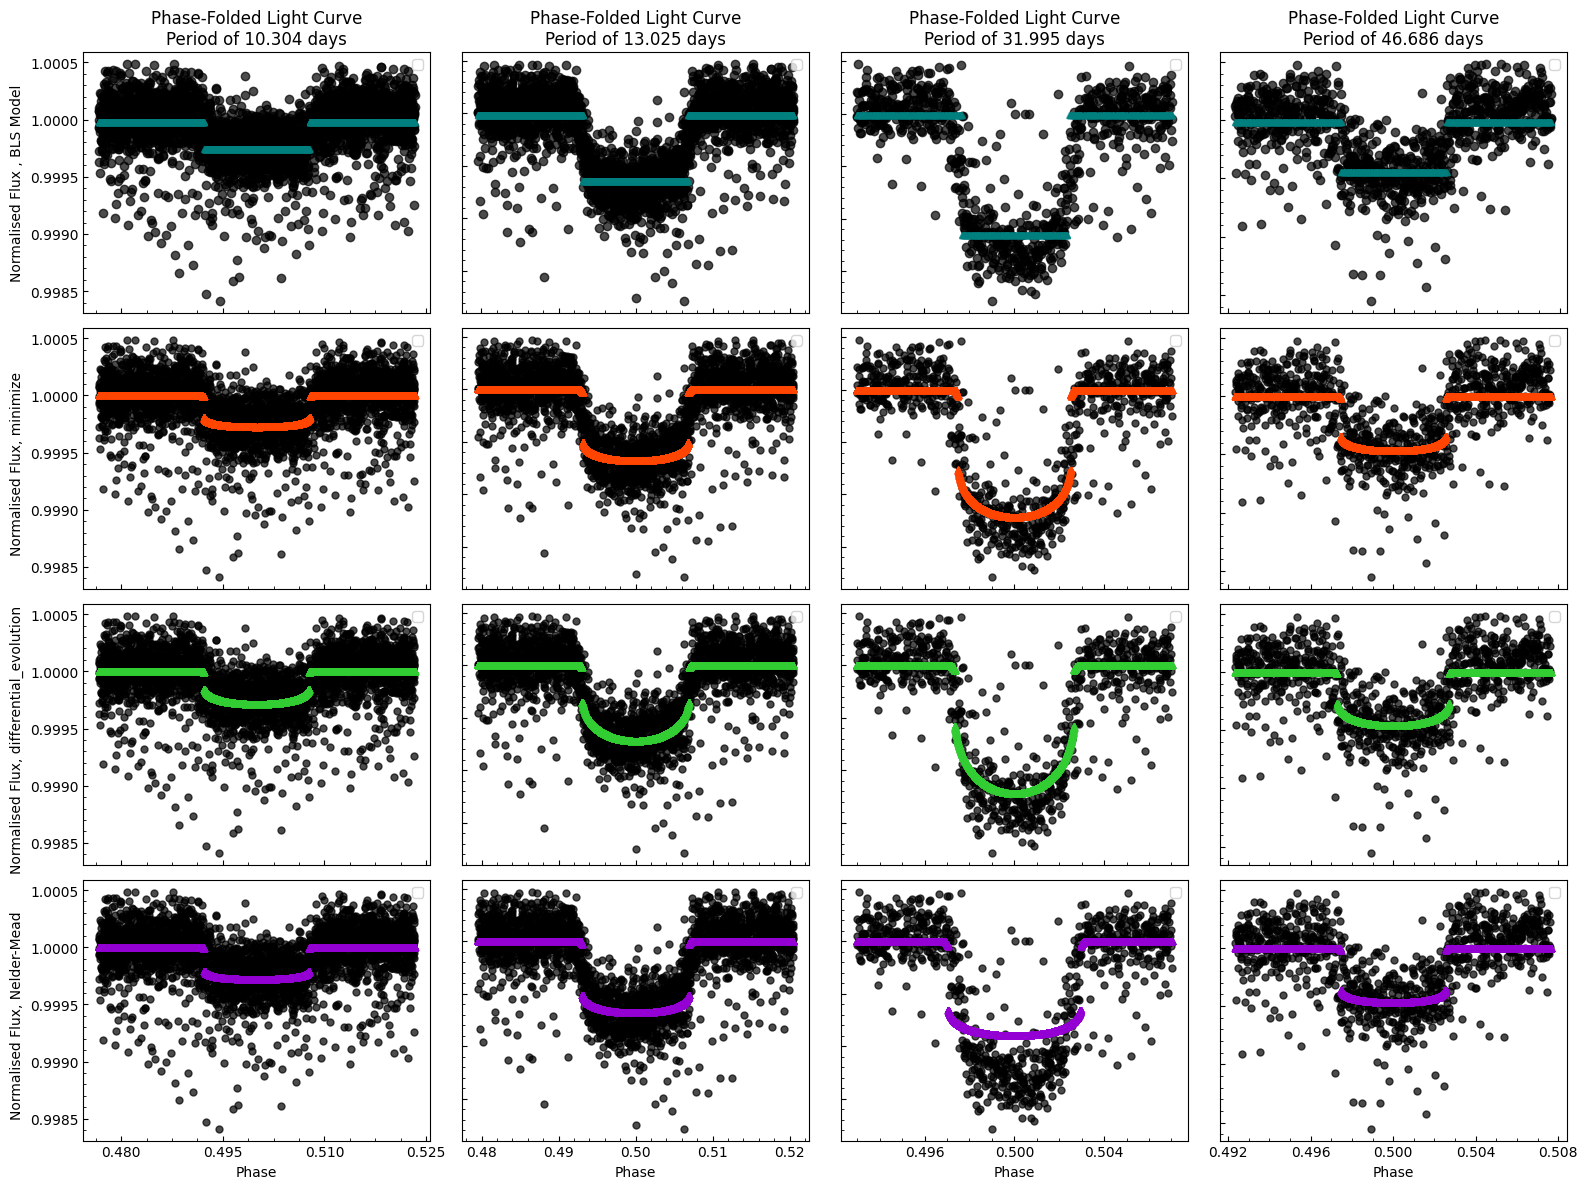

In [13]:
importlib.reload(tff)
importlib.reload(pg)
tff.plot_phase_folded_light_curves(best_fit_results)

In [10]:
importlib.reload(tff)
importlib.reload(pg)
tff.print_best_fit_parameters(best_fit_results,bls_analysis_results)

,Period,lpha,$R_p$,chi2
0,10.30389 ± 0.00000,0.0936 ± 0.0002,0.0177 ± 0.0005,2.1051
1,13.02487 ± 0.00000,0.1044 ± 0.0006,0.0282 ± 0.0013,2.1068
2,31.99544 ± 0.00000,0.2653 ± 0.0169,0.0364 ± 0.0035,3.2788
3,46.68559 ± 0.00000,0.2786 ± 0.0078,0.0228 ± 0.0003,2.4421


<IPython.core.display.Math object>

<IPython.core.display.Math object>

#.## 3. Discussion

$\bullet$ Include a short (~ 200 word) description of a follow-up observations that would address an open question in your report.

You can add subsections in your discussion like this.

<h3 align="center"> 3.1. Analysis of the results </h3>

The results form the model fitting can be found in table.1, one result in particular is the coefficients found for the limb darkening coefficients. The value of $u_1$ of 0.85 seems to lie wihtin the uncertainites matching the typical value used in [], and $u_2$ is found to be X which is expected for light of wavelenght X. 

The reduced $chi^2$ scores all of around X seem to indicate a good fit and that method X is the best method of fitting the synthetic light curve to the data set.

</br>
<h3 align="center"> 3.2. Generating Synthetic Dataset </h3>

##### 3.2.1 Lightcurve generation 

A synthetic dataset has been generated to allow for training of the convolution nEural network, scripting for it can be found in X, it creates a lightcurves for a system by varing the following properties for each planet in the system
Orbital Period, in days
   $$
   P \sim \text{Rand}(1, 50).
   $$
Radius of the planet
   $$
   R_p \sim \text{Rand}(0.01, 0.04),
   $$
This will be in solar radii, and allows the use of taking the transit depth to be
$$
   \delta =  \left(\frac{R_{p,solar}}{R_{star}}\right) ^ 2 = R_p^2 ,
$$
as $R_{star}$ is assumed to be 1.Whenever the planet radius is in the form of solar radii is will be expressed as $R_{p,solar}$. Using solar radii will simplfy the code at numerous point such as calculating the trasnit depeth in the syntehtic light curve generation file.

The semi major axis can be caLculated from the period, it is derived from keplers third law [], and has a small pertubation applied to increase the variations in the dataset, which is inforced by the multiplication by the random number between 0.75 and 1.25.
   $$
   a = P_{earth years}^{\frac{2}{3}} * \text{Rand}(0.75, 1.25)
   $$
Where $\alpha$ is the semi major axis, and $P_{earth years}$ is the period in terms of earth years.

The generator allows for the inclination to be set to any value, but edge on detection is assumed. it sets the inclination to be 
   $$
   i = \frac{\pi}{2}
   $$
This is due to the increase in computational time needed to model in a 3d plane, this is something that can be varied in future iterations as a further parameter. 
The transit midpoint, t_0, is defined as,
   $$
   t_0 \sim \text{Rand}(0, P).
   $$
And the limb darked coefficents are defined as,
   $$
   u1 = \text{Rand} (0.7,0.9),
   u2 = \text{Rand} (0.7,0.9).
   $$
These coefficients determine the shape of the light curve, a small change can change the shape of the light curve signifanctly, especially $u_2$ due to the polynomal nature of the fit , the range chosen will lead to significant variation in the light curves and result in varied training data for the model to train on, this is needed in an attempt to avoid overfitting where the model gets to used to the training data and tries to just fit to that.


#### 3.2.1 Position Calculations

Due to assuming edge on transits the z-direction is negligable, the distance from the star in the x and y direction can be computed as


$$ 
   x = \alpha \cos{\theta},
   y = \alpha \sin{\theta},
$$

Where the orbit angle is defined as,

$$
 \theta  = 2 \pi \frac {t + t_0}{period}.
$$

#### 3.2.2 Light curve calculations.

This allows the determination of if a planet is in a transit.
The model simulates an observer on the y axis with a large positive x value.
A full transit is defined as, 
$$ 
   \text{Full Transit} = \left| y  \right| < \left( R_{star} - R_{planet} \right) 
$$
With a partial transit defined as,
$$ 
   \text{Partial Transit} = \left( R_{star} - R_{p} \right) < \left| y \right| < \left( R_{star} + R_{planet} \right) 
$$
With an extra condition in place to ensure a transit is not being recored when the planet is behind the star from the observers point of view.
$$ 
   \text{Infront of star} = x_{\text{orbit}} > 0.
$$
The intensity is determined based off equation X, and then the flux when a transit dips in full transit is modelled as,

$$
   \delta = \left(\frac{R_{p,solar}}{R_star}\right)^2
$$


While in a partial transit, the transit dEPth is modified as follows


$$
   \Delta = \delta \frac{(R_{star,au} + R_P - |y|)}{R_{star,au}}
$$
Where the radius of the star is now in au.
The complete light curve for the system with multiple planets is obtained by adding the light curves of all individual planets.
The complete light curve is calcualted as follows,
$$
F_{complete} = \frac{1}{N}\sum_{i=1}^{N} F_{i},
$$

Where $F_i$ is defined as 
$$
   F_i =
\begin{cases} 
1 - \Delta I & \text{if } Partial Transit \\
1 - \delta I& \text{if } Full Transit
\end{cases} 
$$


</br>
<h3 align="center"> 3.3. The Neural Networks </h3>

Two types of neural network have been developed, a convolutional neural network, and a recurrant neural network. 

Using the synthetic data generated previously these can be fed into the neural networks to train for planet count detcti, which leads to period prediction. The proposed input of the training data will be the lightcurve, number of detectable planets where a SNR threshold of

$$

SNR =  \frac{\delta}{\sigma_{std}} \sqrt{\phi} 

$$
is applied, $\delta$ is the transit depth, $\sigma{std}$ is the standard deviation of the flux of the lightcurve, and $\phi$ is the number of transit that occurs during the timeframe. This is used to apply a threshold of detectable planets. This will be done in an early effort to prevent overfitting and avoid training the model to detect physicsally undetecTable planets. A threshold of 5 is chosen in accordance with literature  []   

#### 3.3.1 The loss function

The number of detectable planets, along with attached periods and the lightcurve is generated for 400,000 systems and stored in a hdf5 file, this is then trained on a convolution nEural network as seen in Fig.X. Which is evaluated with a loss function of 

$$
Loss = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{1}{M_i} \sum_{j=1}^{M_i} (T_{ij} - P_{ij})^2 \right) + \frac{1}{N} \frac{\tilde{P}}{\tilde{n}}\sum_{i=1}^{N} (n_i - \hat{n}_i)^2 \\
$$

the subscript $i$ denotes THE $i^{th}$ lightcurve, and $j$ is THE $j^{th}$ detectable planet in the system, $M_i$ is the number of detectable periods at index $i$, $T_{ij}$ is the pREdicted period and $P_{ij} is the actual period. $n_i$ is the pREDicted amount of planets and $\hat{n}_i$ $N$ is defined as

$$
N = \text{batch size} * \text{length of input}
$$

The term 

$$
   \frac{\tilde{P}}{\tilde{n}}
$$

Is used to scale the loss in planet prediction to be simiLAr in scale to the loss in the period prediction, the $~$ represents the average value, for the generated dataset $\tilde{P} =25.5$ and $\tilde{n} = 5$

The parameters of the model have been tuned to allow computational efficency, however due to the size of the lightcurves GPU memeory provides a significant bottleneck. The model present in this report has been trained on an RTX 2070 super with 8Gb of vram, training on a large cluster or a GPU with a larger memory would lead to more opportunites for complexity to be added to the model. 

Adam [] was picked for the optimiser with a learning rate of X, a typical learning rates of 1e-4 lead to the model overfitting.

#### 3.3.2 Overfitting 

Overfitting is worthy of its own section in this report. Due to the size of the convolution layers in comparison to the size of the models input significant iterations of the model had little varition on each input, the CNN would find the amount of planets to be approximaley 5,and would approximate all periods to be 25, these are the average of both of these inputs. This is known as a local minimia, AND both of these values are consistently 'good enough'. The large dropout layer is the protection against this local minimun. This layer ignores half of the weights for each calculation, it forces the network to not become reliant on specific neurons and encouranges the network to distribute the information across many neurons making the network more robust.

Furtuthermore due to the RNN being developed after the CNN I have added a layer of recursion where if the periods are too close together they are prediceted agian.However This is not a robust solution as it ignores the very obvious case where a system has 2 periods in close proximety

#### 3.3.3 Demonstration of the model 

In code block X a random lightcurve is generated using the syntehtic lightcurve deveveloped as part of this report, this lightcurve is fed to the neural networks which both make a prediction 

#### 3.3.4 The Model on real data 

The synthetic data has been generated to be comparable to the provided dataset, in code block X below it can be seen that the model does a bad job

#### 3.3.5 Comparison between the CNN and the RNN

The 2 neural networks were not developed in parallel. The CNN was the first iteration with a architectural restructuring done to produce a RNN when it became evident that the CNN would not produce the desired results

</br>

<h3 align="center"> 3.4. Future improvements </h3>

#### 3.4.1. Future Improvements and Limitations.

There are many improvements that could be made to improve the model and the training data

#### 3.4.1.2 Fine tune on the kepler dataset

Fine tuning the model by using the kepler dataset and known planet transits could help the model deal with phenomons unique to real world data that cannot be accurately represented by synthetic data. However, considerations will need to be made. FOR EXAMPLE, the kepler dataset lightcurves will have to be truncated or extended, a variable input could be used as an input [] but that is not a proven method, and while it has potential to improve the model, this is not definite

#### 3.4.1.3 High powered computing time

The inital planned architecture of the model has been heavily scaled back due to memeory limitations 
This model has been trained on a NVIDA RTX 2070s 8GB, a larger GPU or even a GPU cluster would allow for more epochs, larger batches, more training data and oppertunties for a more complex architecture. While it is debateable if a more advanced model will always be better, it is my belief that due to the scale of the input, larger layers would signidicant increase the acccuracy of this model. For the demonstation of the syntehtic lightcurve generator 400,000 light curves where generated 

#### 3.4.2.2. Altered Limb-Darkening effect

While the limb-darkening model chosen is computationally efficent, the following model in [] would allow more a accurate representation of the limb darkening effect leading to more realistic trasnsits.

#### 3.4.2.3 Fit the model onto lower cadence data or data of lower time.

The current dataset provided is one of high cadence, comparing the model to lower cadence data will allow for more percision to be found at the edges of the fitted curve

#### 

<div class="alert alert-block alert-danger">
<b>Word limit: 1500 + 200 words.

Those focussing on more advanced data analysis can use part of their word count in results instead.</b>

\begin{array}{cc}
\text{\Large \textbf{CNN Model}} & \text{\Large \textbf{RNN Model}} \\
\begin{array}{c}
\text{Input Layer: Lightcurve inputted} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Convolutional Layer} \\
\text{Conv1d:} \\
\text{Input: 1 channel} \\
\text{Output:16 channels} \\
\text{Kernel Size: 5} \\
\text{Padding: 2} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Convolutional Layer} \\
\text{Conv1d:} \\
\text{Input: 16 channels} \\
\text{Output: 32 channels} \\
\text{Kernel Size: 5} \\
\text{Padding: 2} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Convolutional Layer} \\
\text{Conv1d:} \\
\text{Input: 32 channels} \\
\text{Output: 64 channels} \\
\text{Kernel Size: 5} \\
\text{Padding: 2} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Max Pooling Layer} \\
\text{MaxPool1d:} \\
\text{Kernel Size: 2} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Fully Connected Layer} \\
\text{Linear:} \\
\text{Input: 128 * 39151} \\
\text{Output: 128} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Dropout Layer} \\
\text{Dropout:} \\
\text{Probability: 0.3} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Fully Connected Layer} \\
\text{Linear:} \\
\text{Input: 128} \\
\text{Output: 1} \\
\hline
\end{array} \\
\downarrow \\
\text{Predicted Number of Planets (scaled to 0-10)} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Fully Connected Layer} \\
\text{Linear:} \\
\text{Input: 128} \\
\text{Output: 10} \\
\hline
\end{array} \\
\downarrow \\
\text{Predicted Periods (up to 10)} 
\end{array} &
\begin{array}{c}
\text{Input Layer: Lightcurve inputted} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{RNN Layer} \\
\text{RNN:} \\
\text{Input: 1 channel} \\
\text{Output: 512 channels} \\
\text{Layers: 2} \\
\text{Dropout: 0.3} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Fully Connected Layer} \\
\text{BayesianDense:} \\
\text{Input: 512} \\
\text{Output: 1} \\
\text{Dropout: 0.3} \\
\hline
\end{array} \\
\downarrow \\
\text{Predicted Number of Planets (scaled to 0-5)} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Fully Connected Layer} \\
\text{BayesianDense:} \\
\text{Input: 512} \\
\text{Output: 1} \\
\text{Dropout: 0.3} \\
\hline
\end{array} \\
\downarrow \\
\text{Predicted Periods (up to 5), Max Period of 50 } \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Checks to ensure periods are not too close:} \\
\text{If periods are too close, they are predicted again} \\
\text{until no conflicts are found (up to 10 iterations)} \\
\text{Re-prediction is done using the RNN output} \\
\hline
\end{array}
\end{array}
\end{array}

In [1]:
importlib.reload(ml_prediction)

ml_results = {}


RNN_model_path = 'RNN_Model.pth'



ml_results['RNN_Synth'] = ml_prediction.main(RNN_model_path,'RNN',True)

print(ml_results['RNN_Synth']['true_periods'])
print(ml_results['RNN_Synth']['predicted_periods'])


NameError: name 'importlib' is not defined

<h3 align = 'center'> Further observations </h3>

### 4. Summary

Machine learning models provide another tool in the arsonal of exoplanet detection, but for an accurate model to be made more computation time is needed due to the sheer scale of the size of the inputs. Moores law is not dead yet and with the active focus in this field it is not unrealistic to assume eventually a model could be produced identifing exoplanets in an unknown system. 

But this does beg the question is a machine learning model really the best approach to detecting exoplanets? The amount of time spent on using traditonal methods with high percision is dwarfed by the development time and compute time spent on creating a model to identify the periods of these planets. Traditonal methods with found 4 planets.  yeiled periods of X, semi major axis's of X and a chi^2 fit of X. The machine learning model found X planets and the periods are X. 


$\bullet$ summarize your results. This can be done in text or bullet points.

<div class="alert alert-block alert-danger">
<b>Word limit: 300 words</b>

### References:

Give all references here. Use the [Harvard referencing style](https://library.bath.ac.uk/referencing/harvard-bath), as is customary in astrophysics.
- Miller & Jones, 2018, ApJ, 00, 000
- Smith et al. 2019, MNRAS, 00, 000
- Willow 1972, AJ, 00, 000

And cite these in the text as "Miller & Jones (2018) showed that all exoplanets are made of cheese, however, Smith et al. (2019) showed Trappist1b is made of chocolate, as previously suggested in the literature (Willow 1972)." 


### Acknowledgments

Acknowlegde the use of any software or datasets here.

In [ ]:
!jupyter nbconvert --to html --no-input Coursework_B_Template.ipynb

zsh:1: command not found: jupyter


https://arxiv.org/abs/2305.06790

http://www.physics.hmc.edu/faculty/esin/a101/limbdarkening.pdf


https://academic.oup.com/mnras/article/514/2/2793/6598817

https://lweb.cfa.harvard.edu/~avanderb/kepler90i.pdf

https://academic.oup.com/mnras/article/514/2/2793/6598817#366927587

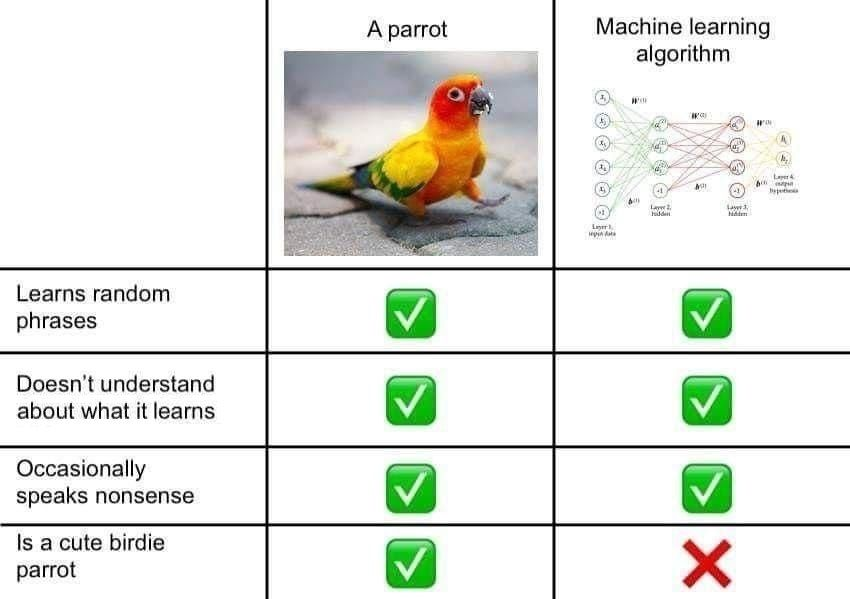

In [ ]:
Image(filename='images/model_comparison_to_parrot.jpg')